In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dat = pd.read_csv('train.csv',index_col = 'PassengerId')
y = dat['Survived'].values
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [53]:
dat['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

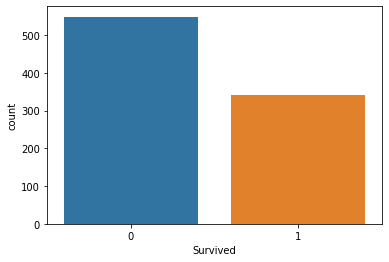

In [54]:
g = sns.countplot(dat['Survived'])

Text(0.5, 1.0, 'Survival Rate')

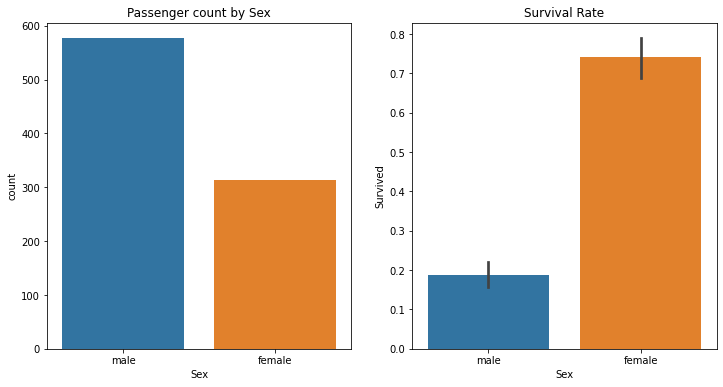

In [55]:
# SEXX
fig,arr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(dat['Sex'],ax = arr[0]).set_title('Passenger count by Sex')
sns.barplot('Sex','Survived',data = dat,ax = arr[1]).set_title('Survival Rate')

In [56]:
##Pclass
dat.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

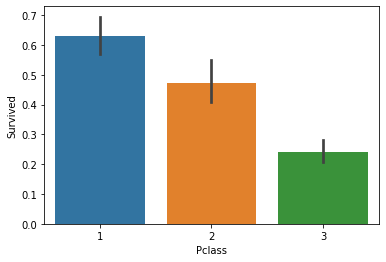

In [57]:
sns.barplot(y = dat['Survived'],x = dat['Pclass'])

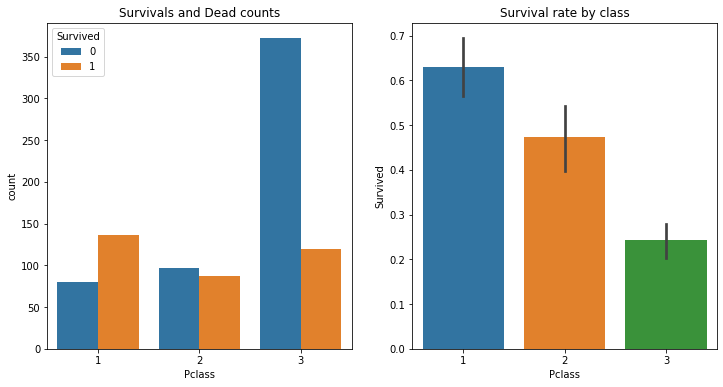

In [58]:
fig,arr = plt.subplots(1,2,figsize = (12,6))
a = sns.countplot(x = 'Pclass', hue = 'Survived',data = dat,ax = arr[0]).set_title("Survivals and Dead counts")
arr[1].set_title("Survival rate by class")
b = sns.barplot(y = 'Survived',x = 'Pclass',data = dat)

In [59]:
# Pclass and Sex
dat.groupby(['Pclass','Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

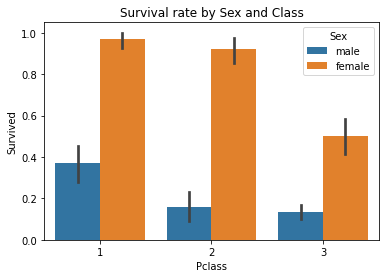

In [60]:
plt.title("Survival rate by Sex and Class")
a = sns.barplot(x = 'Pclass',y = 'Survived',hue = 'Sex',data = dat)

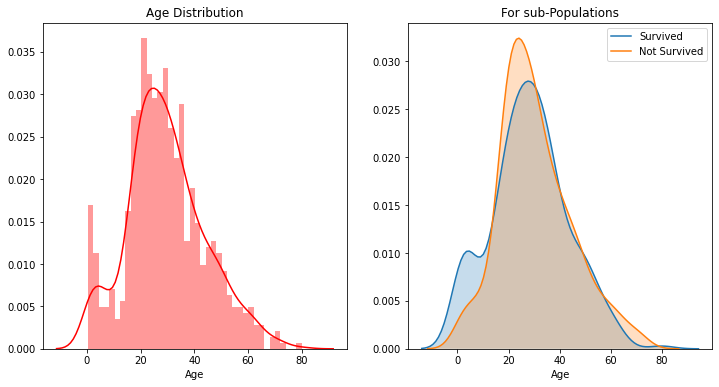

In [61]:
fig, arr = plt.subplots(1,2,figsize = (12,6))
arr[0].set_title("Age Distribution")
f = sns.distplot(dat['Age'],color = 'red', bins = 40, ax = arr[0])
arr[1].set_title("For sub-Populations")
g = sns.kdeplot(dat['Age'].loc[dat['Survived'] == 1],shade = True,ax = arr[1],label='Survived').set_xlabel('Age')
g = sns.kdeplot(dat['Age'].loc[dat['Survived'] == 0],shade = True,ax = arr[1],label='Not Survived').set_xlabel('Age')

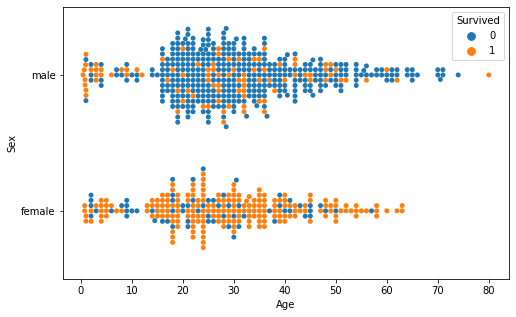

In [62]:
plt.figure(figsize = (8,5))
g = sns.swarmplot(y = 'Sex',x = 'Age', hue = 'Survived',data = dat)

In [63]:
dat.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

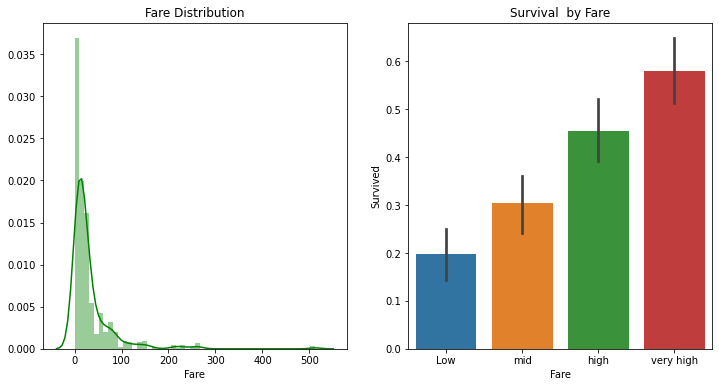

In [64]:
fig,arr = plt.subplots(1,2,figsize = (12,6))
f = sns.distplot(dat.Fare,color='g',ax=arr[0]).set_title('Fare Distribution')
fare_ranges = pd.qcut(dat.Fare,4,labels=['Low','mid','high','very high'])
f = sns.barplot(x = fare_ranges,y = 'Survived',data = dat,ax = arr[1]).set_title('Survival  by Fare')

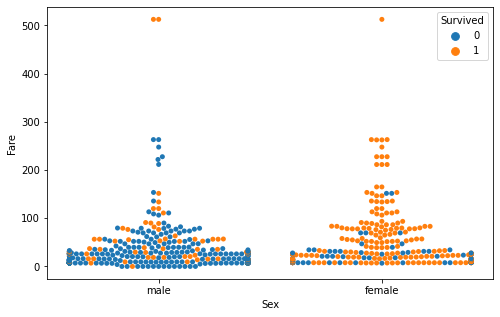

In [65]:
plt.figure(figsize=(8,5))
a = sns.swarmplot(x = 'Sex',y='Fare',hue='Survived',data = dat)

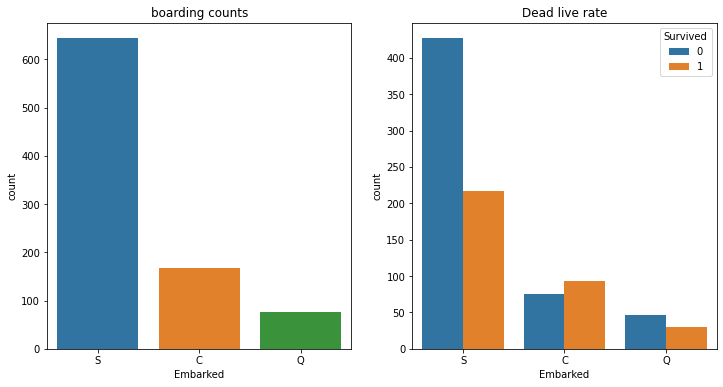

In [66]:
fig,arr = plt.subplots(1,2,figsize = (12,6))
sns.countplot(dat['Embarked'],ax = arr[0]).set_title("boarding counts")
p = sns.countplot(x='Embarked',hue = 'Survived',data = dat,ax=arr[1]).set_title("Dead live rate")

In [67]:
dat['Title'] = dat['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
dat['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
the Countess      1
Capt              1
Lady              1
Sir               1
Don               1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

In [68]:
dat['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'],'Miss',inplace=True)
dat['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'],'Mr',inplace=True)
test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'],'Miss',inplace=True)
test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'],'Mr',inplace=True)
dat['Title'].value_counts()
test['Title'].value_counts()

Mr        242
Miss       80
Mrs        72
Master     21
Rev         2
Dr          1
Name: Title, dtype: int64

Text(0.5, 1.0, 'Survival by names')

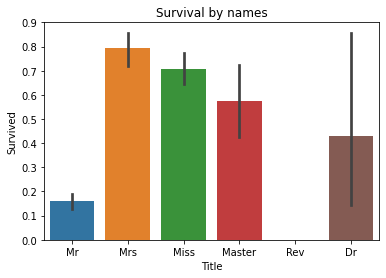

In [69]:
sns.barplot(x='Title',y = 'Survived',data = dat).set_title('Survival by names')

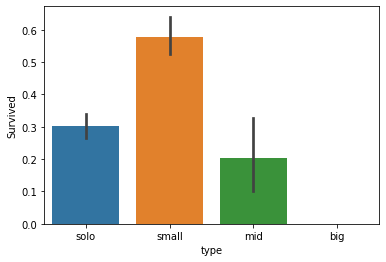

In [70]:
dat['size_fam'] = dat['SibSp']+dat['Parch']+1
test['size_fam'] = test['SibSp']+test['Parch']+1
dat['type'] = pd.cut(dat.size_fam,[0,1,4,7,11],labels=['solo','small','mid','big'])
test['type'] = pd.cut(test.size_fam,[0,1,4,7,11],labels=['solo','small','mid','big'])
sns.barplot(x='type',y='Survived',data=dat)

In [89]:
train_y = dat['Survived']
features = ['Pclass', 'Sex', 'Fare', 'Title', 'Embarked', 'type']
X = pd.get_dummies(dat[features])
X_test = pd.get_dummies(test[features])
X.head()
X_test.head()

,Pclass,Fare,Sex_female,Sex_male,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Embarked_C,Embarked_Q,Embarked_S,type_solo,type_small,type_mid,type_big
0,3,7.8292,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
1,3,7.0000,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,2,9.6875,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,3,8.6625,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
4,3,12.2875,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Title', 'Embarked', 'type']

my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X)
X_test = my_imputer.fit_transform(X_test)

model = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=1)
model.fit(X,train_y)
predictions = model.predict(X_test)
# X_test.shape

# predictions.size
# X_test.shape
output =  pd.DataFrame({'PassengerId' : test.PassengerId,'Survived' : predictions})
output.to_csv('my_first_submission.csv',index=False)
print('Sucess')

Sucess
